<a href="https://colab.research.google.com/github/karlopehar1/racunalni-vid/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/SUMMostar/lab5-karlopehar1.git clone


!cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 9 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 149.16 KiB | 29.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.


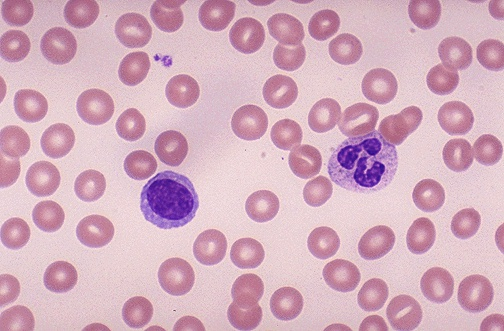

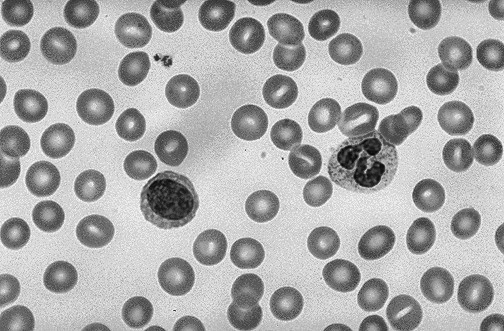

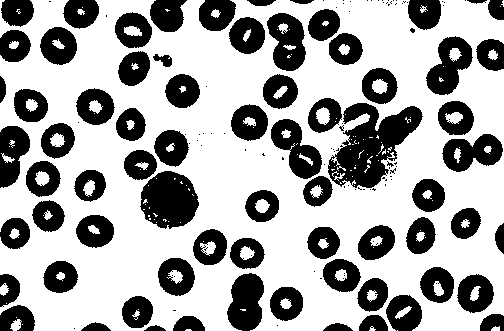

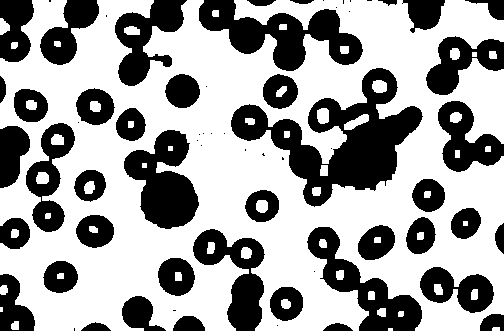

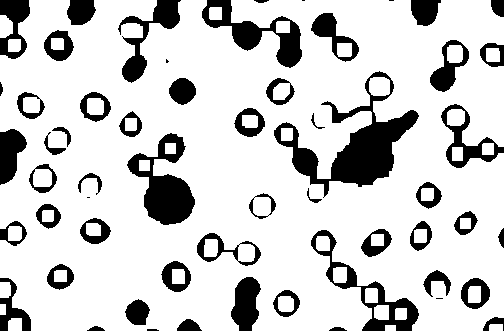

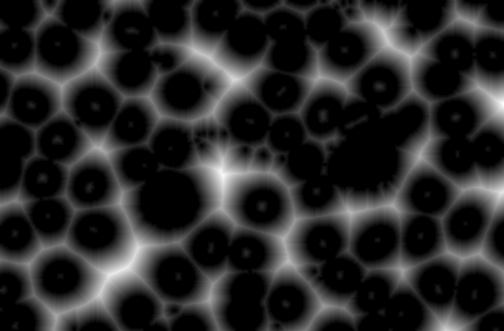

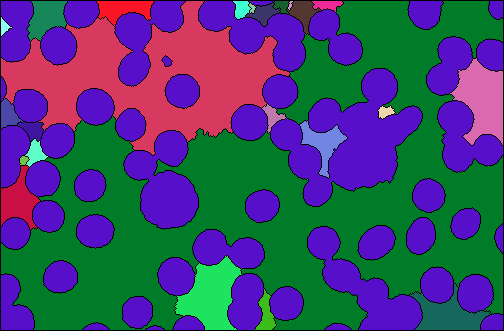

True

In [3]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import random as rng

img = cv.imread('images/cells.jpg')
if img is None:
    raise ValueError("Slika nije pronađena, provjeri putanju!")
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)
cv2_imshow(gray)

ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv2_imshow(thresh)
cv.imwrite("images/thresholded.png", thresh)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
cv2_imshow(opening)

sure_bg = cv.dilate(opening, kernel, iterations=3)
cv2_imshow(sure_bg)

dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 3)
cv.normalize(dist_transform, dist_transform, 0, 1.0, cv.NORM_MINMAX)
cv2_imshow(dist_transform*255)

ret, sure_fg = cv.threshold(dist_transform, 0.2*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

ret, markers = cv.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

markers = cv.watershed(img, markers)

colors = []
for i in range(np.max(markers)):
    colors.append((rng.randint(0,255), rng.randint(0,255), rng.randint(0,255)))

dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(colors):
            dst[i,j,:] = colors[index-1]

cv2_imshow(dst)
cv.imwrite("images/result.png", dst)
